In [1]:
from dataset import OpenAlexGraphDataset
from main import main as trainer

/home/tvg/miniconda3/envs/ml-graphs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Training over all permutations of features

In [2]:
config = {
    "base_lr": 0.008, 
    "hidden_channels": 256, 
    "num_layers": 2, 
    "dropout": 0.3, 
    "out_channels": 128
}

for use_subfield_embedding in [False, True]:
    for use_field_embedding in [False, True]:
        for use_title_embedding in [False, True]:
            dataset = OpenAlexGraphDataset(
                num_authors=-1, 
                use_cache=False,
                use_subfield_embedding=use_subfield_embedding,
                use_field_embedding=use_field_embedding,
                use_title_embedding=use_title_embedding
            )

            print(f"Training with use_subfield_embedding={use_subfield_embedding}, use_field_embedding={use_field_embedding}, use_title_embedding={use_title_embedding}")
            trainer(dataset_builder=dataset, config=config, N_RUNS=5)


Loading sentence model...
Done!
Building datasets...
Done!
Saving processed data to cache...
Done!
Training with use_subfield_embedding=False, use_field_embedding=False, use_title_embedding=False

Final Statistics over 5 runs with the best config:
--------------------------------------------------

Untrained Val:
  roc_auc : 0.5387 ± 0.0918
  pr_auc  : 0.5523 ± 0.1055

Untrained Dev Test:
  roc_auc : 0.4486 ± 0.0909
  pr_auc  : 0.5427 ± 0.0454

Untrained Test:
  roc_auc : 0.5998 ± 0.0423
  pr_auc  : 0.6764 ± 0.0404

Final Val:
  roc_auc : 0.9288 ± 0.0127
  pr_auc  : 0.8883 ± 0.0378

Final Dev Test:
  roc_auc : 0.8715 ± 0.0199
  pr_auc  : 0.8260 ± 0.0187

Final Test:
  roc_auc : 0.8146 ± 0.0301
  pr_auc  : 0.8069 ± 0.0223
--------------------------------------------------
Loading sentence model...
Done!
Building datasets...
Done!
Saving processed data to cache...
Done!
Training with use_subfield_embedding=False, use_field_embedding=False, use_title_embedding=True

Final Statistics over 

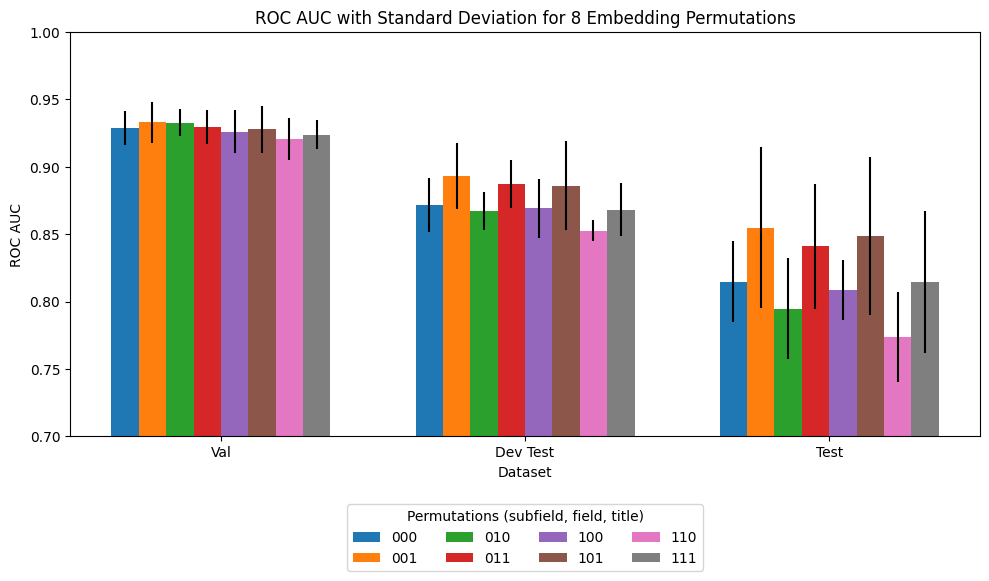

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data: [Val, Dev Test, Test] for each permutation
means = np.array([
    [0.9288, 0.8715, 0.8146],
    [0.9330, 0.8930, 0.8548],
    [0.9327, 0.8674, 0.7947],
    [0.9295, 0.8874, 0.8409],
    [0.9259, 0.8691, 0.8085],
    [0.9278, 0.8861, 0.8485],
    [0.9207, 0.8527, 0.7739],
    [0.9239, 0.8682, 0.8144],
])

stds = np.array([
    [0.0127, 0.0199, 0.0301],
    [0.0151, 0.0246, 0.0596],
    [0.0100, 0.0142, 0.0375],
    [0.0128, 0.0177, 0.0462],
    [0.0160, 0.0220, 0.0223],
    [0.0174, 0.0330, 0.0585],
    [0.0157, 0.0080, 0.0334],
    [0.0108, 0.0198, 0.0528],
])

labels = ['000', '001', '010', '011', '100', '101', '110', '111']
categories = ['Val', 'Dev Test', 'Test']

x = np.arange(len(categories))
width = 0.09  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(labels)):
    ax.bar(x + (i - 3.5) * width, means[i], width, yerr=stds[i], label=labels[i])

ax.set_ylim(0.7, 1.0)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Dataset')
ax.set_ylabel('ROC AUC')
ax.set_title('ROC AUC with Standard Deviation for 8 Embedding Permutations')
ax.legend(title='Permutations (subfield, field, title)', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

plt.tight_layout()
plt.show()

In [2]:
config = {
    "base_lr": 0.008, 
    "hidden_channels": 256, 
    "num_layers": 2, 
    "dropout": 0.3, 
    "out_channels": 128
}

for use_citation_count in [False, True]:
    for use_work_count in [False, True]:
        for use_institution_embedding in [False, True]:
            dataset = OpenAlexGraphDataset(
                num_authors=-1, 
                use_cache=False,
                use_citation_count=use_citation_count,
                use_work_count=use_work_count,
                use_institution_embedding=use_institution_embedding,
            )

            print(f"Training with use_citation_count={use_citation_count}, use_work_count={use_work_count}, use_institution_embedding={use_institution_embedding}")
            trainer(dataset_builder=dataset, config=config, N_RUNS=5)


Loading sentence model...
Done!
Building datasets...
Done!
Saving processed data to cache...
Done!
Training with use_citation_count=False, use_work_count=False, use_institution_embedding=False

Final Statistics over 5 runs with the best config:
--------------------------------------------------

Untrained Val:
  roc_auc : 0.5493 ± 0.0951
  pr_auc  : 0.6069 ± 0.0989

Untrained Dev Test:
  roc_auc : 0.4203 ± 0.1089
  pr_auc  : 0.5102 ± 0.0457

Untrained Test:
  roc_auc : 0.4758 ± 0.0999
  pr_auc  : 0.5038 ± 0.0696

Final Val:
  roc_auc : 0.9116 ± 0.0217
  pr_auc  : 0.8932 ± 0.0184

Final Dev Test:
  roc_auc : 0.8519 ± 0.0287
  pr_auc  : 0.8218 ± 0.0202

Final Test:
  roc_auc : 0.7968 ± 0.0359
  pr_auc  : 0.7956 ± 0.0145
--------------------------------------------------
Loading sentence model...
Done!
Building datasets...
Done!
Saving processed data to cache...
Done!
Training with use_citation_count=False, use_work_count=False, use_institution_embedding=True

Final Statistics over 5 runs

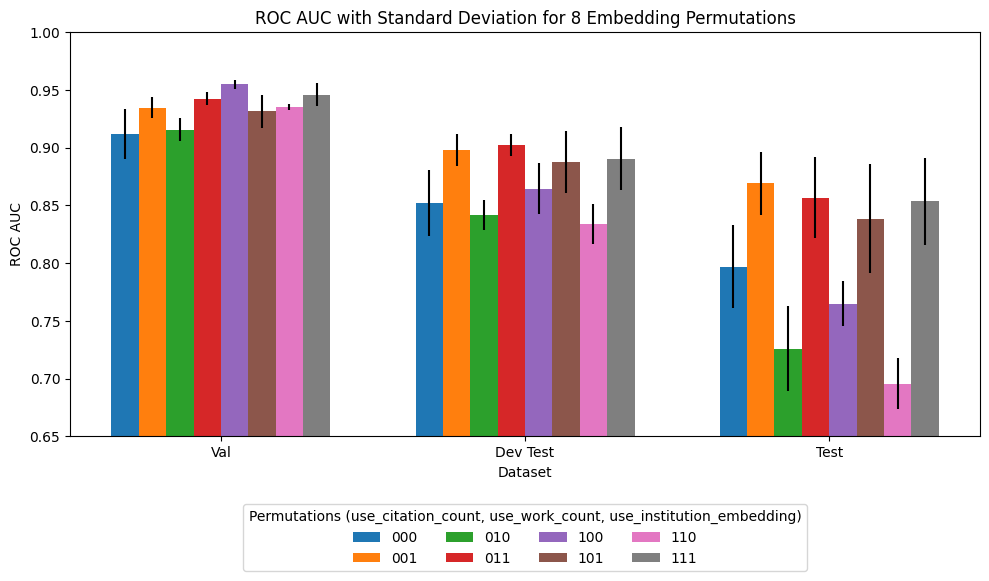

In [3]:
import numpy as np
import matplotlib.pyplot as plt

means = np.array([
    [0.9116, 0.8519, 0.7968],
    [0.9345, 0.8976, 0.8690],
    [0.9152, 0.8415, 0.7258],
    [0.9423, 0.9025, 0.8566],
    [0.9549, 0.8645, 0.7647],
    [0.9313, 0.8875, 0.8384],
    [0.9352, 0.8340, 0.6956],
    [0.9458, 0.8904, 0.8534],
])

stds = np.array([
    [0.0217, 0.0287, 0.0359],
    [0.0091, 0.0137, 0.0274],
    [0.0100, 0.0127, 0.0368],
    [0.0059, 0.0096, 0.0348],
    [0.0039, 0.0224, 0.0193],
    [0.0142, 0.0266, 0.0469],
    [0.0028, 0.0174, 0.0224],
    [0.0103, 0.0276, 0.0375],
])

labels = ['000', '001', '010', '011', '100', '101', '110', '111']
categories = ['Val', 'Dev Test', 'Test']

x = np.arange(len(categories))
width = 0.09

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(labels)):
    ax.bar(x + (i - 3.5) * width, means[i], width, yerr=stds[i], label=labels[i])

ax.set_ylim(0.65, 1.0)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Dataset')
ax.set_ylabel('ROC AUC')
ax.set_title('ROC AUC with Standard Deviation for 8 Embedding Permutations')
ax.legend(title='Permutations (use_citation_count, use_work_count, use_institution_embedding)', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

plt.tight_layout()
plt.show()

# Varying number of authors

In [ ]:
config = {
    "base_lr": 0.008, 
    "hidden_channels": 256, 
    "num_layers": 2, 
    "dropout": 0.3, 
    "out_channels": 128
}


for num_authors in [100, 200, 400, 800, 1600, -1]:
    dataset = OpenAlexGraphDataset(
        num_authors=num_authors, 
        use_cache=False,
        use_citation_count=True,
        use_work_count=True,
        use_institution_embedding=True
    )

    print(f"Training with {num_authors} authors")
    trainer(dataset_builder=dataset, config=config, N_RUNS=5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

means = np.array([
    [0.9116, 0.8519, 0.7968],
    [0.9345, 0.8976, 0.8690],
    [0.9152, 0.8415, 0.7258],
    [0.9423, 0.9025, 0.8566],
    [0.9549, 0.8645, 0.7647],
    [0.9313, 0.8875, 0.8384],
    [0.9352, 0.8340, 0.6956],
    [0.9458, 0.8904, 0.8534],
])

stds = np.array([
    [0.0217, 0.0287, 0.0359],
    [0.0091, 0.0137, 0.0274],
    [0.0100, 0.0127, 0.0368],
    [0.0059, 0.0096, 0.0348],
    [0.0039, 0.0224, 0.0193],
    [0.0142, 0.0266, 0.0469],
    [0.0028, 0.0174, 0.0224],
    [0.0103, 0.0276, 0.0375],
])

labels = ['000', '001', '010', '011', '100', '101', '110', '111']
categories = ['Val', 'Dev Test', 'Test']

x = np.arange(len(categories))
width = 0.09

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(labels)):
    ax.bar(x + (i - 3.5) * width, means[i], width, yerr=stds[i], label=labels[i])

ax.set_ylim(0.65, 1.0)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Dataset')
ax.set_ylabel('ROC AUC')
ax.set_title('ROC AUC with Standard Deviation for 8 Embedding Permutations')
ax.legend(title='Permutations (use_citation_count, use_work_count, use_institution_embedding)', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

plt.tight_layout()
plt.show()

# Varying Number of Layers and Dropout

In [2]:
base_config = {
    "base_lr": 0.008, 
    "hidden_channels": 256, 
    "num_layers": 2, 
    "dropout": 0.3, 
    "out_channels": 128
}

dataset = OpenAlexGraphDataset(
    num_authors=-1, 
    use_cache=False,

    use_citation_count=True,
    use_work_count=True,
    use_institution_embedding=True,
    
    use_subfield_embedding=False,
    use_field_embedding=False,
    use_title_embedding=True
)

for num_layers in [1, 2, 3, 4]: 
    for dropout in [0.1, 0.3, 0.5, 0.7]:
        base_config["num_layers"] = num_layers
        base_config["dropout"] = dropout
        print(f"Training with {num_layers} layers and {dropout} dropout")
        trainer(dataset_builder=dataset, config=base_config, N_RUNS=5)

Loading sentence model...
Done!
Building datasets...
Done!
Saving processed data to cache...
Done!
Training with 1 layers and 0.1 dropout

Final Statistics over 5 runs with the best config:
--------------------------------------------------

Untrained Val:
  roc_auc : 0.5824 ± 0.0809
  pr_auc  : 0.6777 ± 0.0909

Untrained Dev Test:
  roc_auc : 0.4021 ± 0.0628
  pr_auc  : 0.5424 ± 0.0293

Untrained Test:
  roc_auc : 0.5834 ± 0.0670
  pr_auc  : 0.6732 ± 0.0392

Final Val:
  roc_auc : 0.9362 ± 0.0176
  pr_auc  : 0.9043 ± 0.0243

Final Dev Test:
  roc_auc : 0.8835 ± 0.0253
  pr_auc  : 0.8456 ± 0.0184

Final Test:
  roc_auc : 0.8419 ± 0.0395
  pr_auc  : 0.8390 ± 0.0234
--------------------------------------------------
Training with 1 layers and 0.3 dropout

Final Statistics over 5 runs with the best config:
--------------------------------------------------

Untrained Val:
  roc_auc : 0.5831 ± 0.0851
  pr_auc  : 0.6785 ± 0.0934

Untrained Dev Test:
  roc_auc : 0.3992 ± 0.0613
  pr_auc  : 0

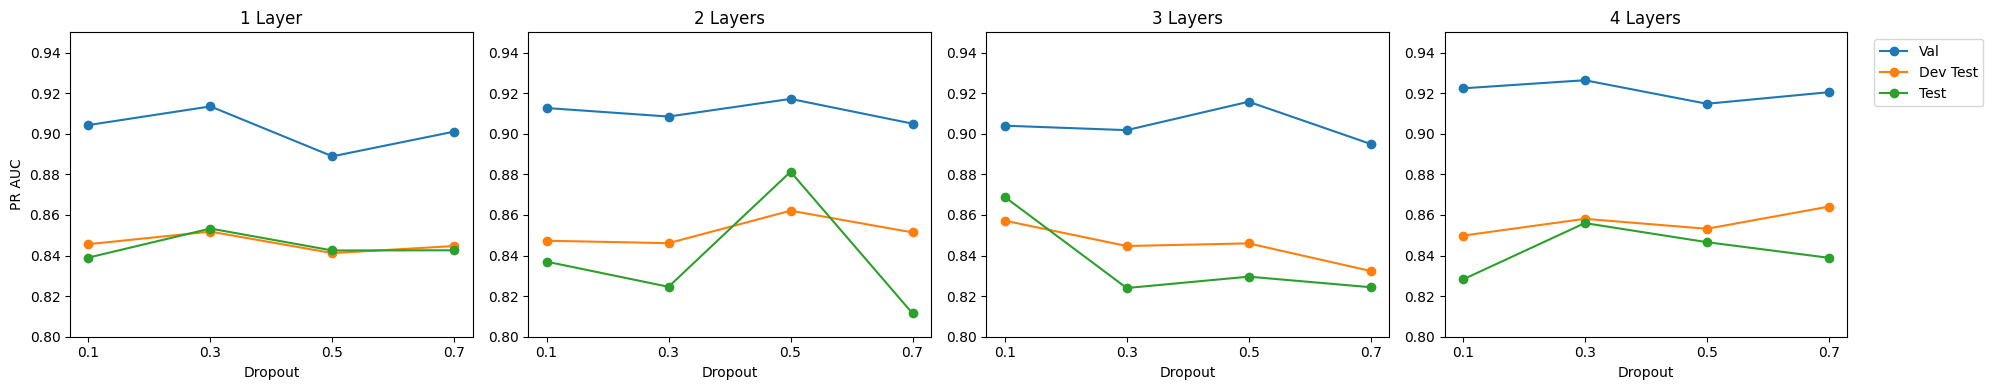

In [9]:
import matplotlib.pyplot as plt

# Dropout values
dropouts = [0.1, 0.3, 0.5, 0.7]

# PR AUC means for Val, Dev Test, Test
pr_val = [0.9043, 0.9135, 0.8889, 0.9011, 0.9127, 0.9085, 0.9172, 0.9050,
          0.9040, 0.9018, 0.9158, 0.8950, 0.9224, 0.9264, 0.9148, 0.9205]
pr_dev = [0.8456, 0.8518, 0.8412, 0.8447, 0.8473, 0.8461, 0.8621, 0.8514,
          0.8572, 0.8447, 0.8460, 0.8324, 0.8498, 0.8581, 0.8532, 0.8641]
pr_test = [0.8390, 0.8533, 0.8425, 0.8426, 0.8370, 0.8246, 0.8813, 0.8115,
           0.8689, 0.8240, 0.8296, 0.8244, 0.8282, 0.8560, 0.8466, 0.8389]

# Create a figure with 4 subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot for each layer configuration
for layer in range(1, 5):
    start = (layer - 1) * 4
    end = start + 4
    ax = axes[layer-1]
    
    ax.plot(dropouts, pr_val[start:end], marker='o', label='Val')
    ax.plot(dropouts, pr_dev[start:end], marker='o', label='Dev Test')
    ax.plot(dropouts, pr_test[start:end], marker='o', label='Test')

    ax.set_ylim(0.8, 0.95)

    ax.set_xlabel('Dropout')
    if layer == 1:  # Only add y-label to first subplot
        ax.set_ylabel('PR AUC')
    ax.set_title(f'{layer} Layer{"s" if layer > 1 else ""}')
    ax.set_xticks(dropouts)
    if layer == 4:  # Only add legend to last subplot
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
